In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
import re

# Download tokenizers (required for newer NLTK)
nltk.download("punkt")
nltk.download("punkt_tab")

# Load your fear lexicon
fear_lexicon_path = "/home/blitz/Desktop/NLP/Project/data/fear_lexicon.txt"
fear_lexicon = pd.read_csv(fear_lexicon_path, header=None, names=["word"])
fear_words = set(fear_lexicon["word"].str.lower())
print("Loaded fear words:", len(fear_words))



Loaded fear words: 242


[nltk_data] Downloading package punkt to /home/blitz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/blitz/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [9]:
pet_path = "/home/blitz/Desktop/NLP/Project/data/PetSemetary_updated.txt"
sh_path  = "/home/blitz/Desktop/NLP/Project/data/TheShining_updated.txt"

with open(pet_path, "r", encoding="utf-8") as f:
    pet_text = f.read()

with open(sh_path, "r", encoding="utf-8") as f:
    sh_text = f.read()

def clean_text(t):
    t = t.lower()
    t = re.sub(r"[^a-zA-Z\s]", " ", t)
    t = re.sub(r"\s+", " ", t)
    return t.strip()

pet_clean = clean_text(pet_text)
sh_clean  = clean_text(sh_text)

print("Cleaning complete.")



Cleaning complete.


In [10]:
# Tokenize
pet_tokens = word_tokenize(pet_clean)
sh_tokens  = word_tokenize(sh_clean)

print("Pet Sematary tokens:", len(pet_tokens))
print("The Shining tokens:", len(sh_tokens))

# Extract fear words
pet_fear_words = [w for w in pet_tokens if w in fear_words]
sh_fear_words  = [w for w in sh_tokens  if w in fear_words]

# Frequency tables
pet_fear_freq = pd.Series(pet_fear_words).value_counts()
sh_fear_freq  = pd.Series(sh_fear_words).value_counts()

print("Fear-word extraction complete.")


Pet Sematary tokens: 153210
The Shining tokens: 165519
Fear-word extraction complete.


In [11]:
# Number of top words to show
N = 10

pet_top = pet_fear_freq.nlargest(N).sort_values()
sh_top  = sh_fear_freq.nlargest(N).sort_values()

print("Top words selected.")


Top words selected.


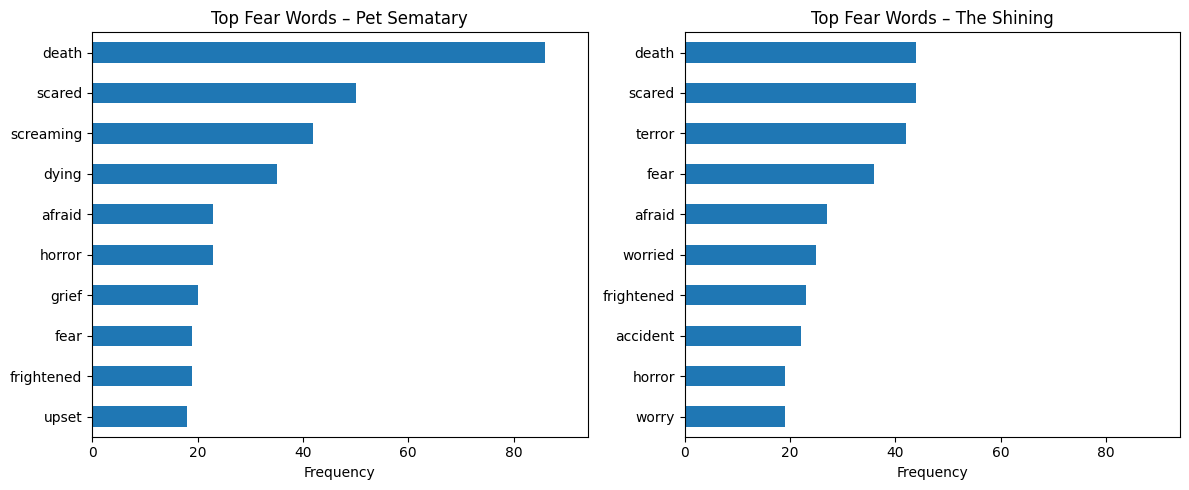

In [12]:
# Static, comparable scale for both graphs
max_count = int(max(pet_top.max(), sh_top.max()) * 1.1)

plt.figure(figsize=(12, 5))

# --- Pet Sematary ---
plt.subplot(1, 2, 1)
pet_top.plot(kind="barh")
plt.title("Top Fear Words – Pet Sematary")
plt.xlabel("Frequency")
plt.xlim(0, max_count)

# --- The Shining ---
plt.subplot(1, 2, 2)
sh_top.plot(kind="barh")
plt.title("Top Fear Words – The Shining")
plt.xlabel("Frequency")
plt.xlim(0, max_count)

plt.tight_layout()
plt.show()
